![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

# #02 | Decision Tree: A Classification Model

## Machine Learning, what does it mean?

In [4]:
%%HTML
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Machine Learning, what does it mean? ⏯<br><br>· The machine learns...<br><br>Ha ha, not funny! 🤨 What does it learn?<br><br>· A mathematical equation. For example: <a href="https://t.co/sjtq9F2pq7">pic.twitter.com/sjtq9F2pq7</a></p>&mdash; Jesús López (@sotastica) <a href="https://twitter.com/sotastica/status/1449735653328031745?ref_src=twsrc%5Etfw">October 17, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

## How does the Decision Tree Algorithm computes the Mathematical Equation?

In [5]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/_L39rN6gz7Y" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## How do we compute a Decision Tree Model in Python?

We should know from the previous chapter that we need function which is accessible from a Class in the library `sklearn`.

### Import the Class

In [6]:
from sklearn.tree import DecisionTreeClassifier

### Instantiante the Class

In [7]:
model_dt = DecisionTreeClassifier()

In [8]:
model_dt.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0}

### Access the Function

The theoretical action we'd like to perform is the same we executed in the previous chapter. Therefore, the function should be called the same way:

In [9]:
model_dt.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

Why is it asking for two parameters: `X` and `y`?

- They are:
    - `X`: explanatory ~ dependent ~ feature variables
    - `y`: target ~ independent ~ label ~ class variable`X`

## Data for Exemplification

Load the Titanic dataset with the below commands
- This dataset **people** (rows) aboard the Titanic
- And their **sociological characteristics** (columns)
- The aim of this dataset is to predict the probability to `survive`
- Based on the social demographic characteristics.

In [10]:
import seaborn as sns #!
import pandas as pd

df_titanic = sns.load_dataset(name='titanic').iloc[:, :4]
df_titanic

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
...,...,...,...,...
889,1,1,male,26.0
890,0,3,male,32.0


## Separate the Variables

In [11]:
explanatory = df_titanic.drop(columns='survived')

In [12]:
target = df_titanic[['survived']]

### Compute the Model

In [13]:
model_dt.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0}

In [14]:
model_dt.fit(X=explanatory, y=target)

ValueError: could not convert string to float: 'male'

## Data Preprocessing

The error says:
    
```python
ValueError: could not convert string to float: 'male'
```

From which we can interpret that the function `.fit()` does **not accept values of `string` type** like the ones in `sex` column:

In [ ]:
df_titanic

### Dummy Variables

Therefore, we need to convert the categorical columns to **dummies** (0s & 1s):

In [15]:
pd.get_dummies(df_titanic, drop_first=True)

,survived,pclass,age,sex_male
0,0,3,22.0,1
1,1,1,38.0,0
...,...,...,...,...
889,1,1,26.0,1
890,0,3,32.0,1


In [16]:
df_titanic = pd.get_dummies(df_titanic, drop_first=True)

In [17]:
explanatory = df_titanic.drop(columns='survived')

In [18]:
target = df_titanic[['survived']]

Now we should be able to fit the model:

In [19]:
model_dt.fit(X=explanatory, y=target)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### Missing Data

The data passed to the function contains **missing data** (`NaN`). Precisely 177 people from which we don't have the age:

In [20]:
df_titanic.isna()

,survived,pclass,age,sex_male
0,False,False,False,False
1,False,False,False,False
...,...,...,...,...
889,False,False,False,False
890,False,False,False,False


In [21]:
df_titanic.isna().sum()

survived      0
pclass        0
age         177
sex_male      0
dtype: int64

Who are the people who lack the information?

In [22]:
mask_na = df_titanic.isna().sum(axis=1) > 0

In [23]:
df_titanic[mask_na]

,survived,pclass,age,sex_male
5,0,3,NaN,1
17,1,2,NaN,1
...,...,...,...,...
878,0,3,NaN,1
888,0,3,NaN,0


What could we do with them?

- There are many possibilities:
    1. Drop them from the dataset.
    2. Fill the age by the average age of other combinations (like males who survived)
    3. Apply an algorithm to fill them.
    
In order to simplify the chapter, we will drop them from the dataset.

We go from 891 people:

In [24]:
df_titanic

,survived,pclass,age,sex_male
0,0,3,22.0,1
1,1,1,38.0,0
...,...,...,...,...
889,1,1,26.0,1
890,0,3,32.0,1


To 714 people:

In [25]:
df_titanic.dropna()

,survived,pclass,age,sex_male
0,0,3,22.0,1
1,1,1,38.0,0
...,...,...,...,...
889,1,1,26.0,1
890,0,3,32.0,1


In [26]:
df_titanic = df_titanic.dropna()

In [27]:
explanatory = df_titanic.drop(columns='survived')

In [28]:
target = df_titanic[['survived']]

Now we shouldn't have any more trouble with the data to finally fit the model.

## Small Recap

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
model_dt = DecisionTreeClassifier()

In [31]:
model_dt.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0}

## The Decision Tree Model

### Compute the Mathematical Equation

In [32]:
model_dt.fit(X=explanatory, y=target)

DecisionTreeClassifier()

In [33]:
model_dt.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['pclass', 'age', 'sex_male'], dtype=object),
 'n_features_in_': 3,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 3,
 'tree_': <sklearn.tree._tree.Tree at 0x15ded89d0>}

### Model Visualization

The **Decision Tree** model doesn't especifically have a mathematical equation. But rather, a set of conditions represented in a tree:

In [34]:
from sklearn.tree import plot_tree

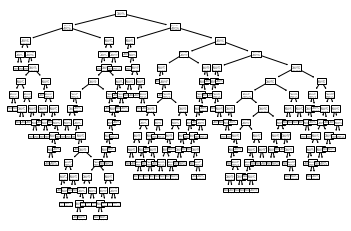

In [35]:
plot_tree(decision_tree=model_dt);

There are many conditions, let's recreate a shorter tree to explain the Mathematical Equation of the Decision Tree:

In [36]:
model_dt = DecisionTreeClassifier(max_depth=2)

In [37]:
model_dt.fit(X=explanatory, y=target)

DecisionTreeClassifier(max_depth=2)

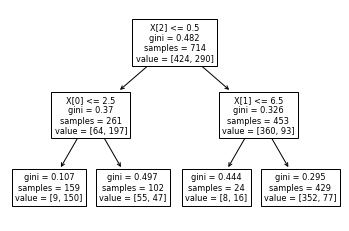

In [38]:
plot_tree(decision_tree=model_dt);

Let's make the image bigger:

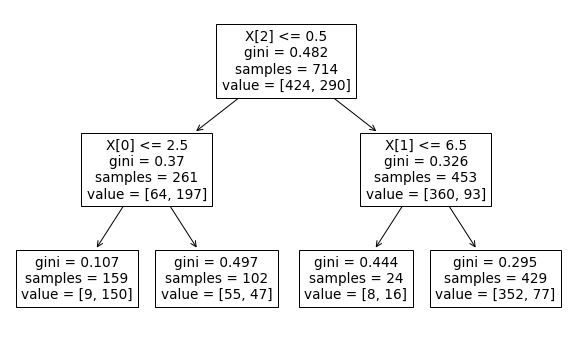

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(decision_tree=model_dt);

The conditions are `X[2]<=0.5`. The `X[2]` means the 3rd variable (Python starts counting at 0) of the explanatory ones. If we'd like to see the names of the columns, we need to add the `feature_names` parameter:

In [40]:
explanatory.columns

Index(['pclass', 'age', 'sex_male'], dtype='object')

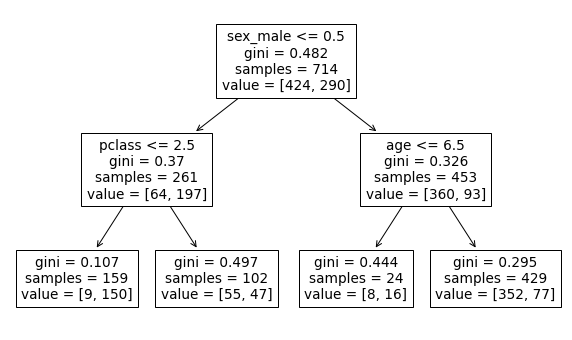

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(decision_tree=model_dt, feature_names=explanatory.columns);

Let's add some colours to see how the predictions will go based on the fulfilled conditions:

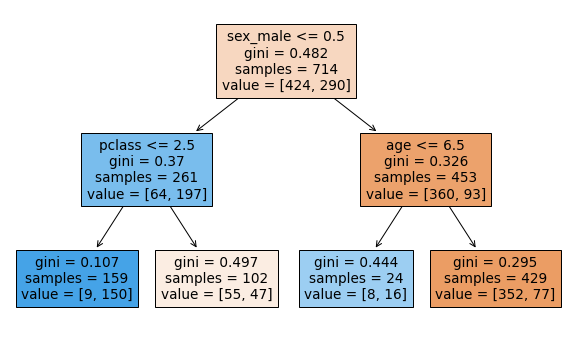

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(decision_tree=model_dt, feature_names=explanatory.columns, filled=True);

### Model Interpretation

Let's take a person from the data to explain how the model makes a prediction. For the sake of storytelling, let's say the name of the person is John.

John is a 22 year old men who took the titanic on 3rd class, but didn't survive:

In [43]:
df_titanic[:1]

,survived,pclass,age,sex_male
0,0,3,22.0,1


Based on the tree the conditions are:

#### 1st condition

- sex_male (John=1) <= 0.5 ~ False

John doesn't fulfill the condition, we move to the right side of the tree.

#### 2nd condition

- age (John=22.0) <= 6.5 ~ False

John doesn't fulfill the condition, we move to the right side of the tree.

#### Leaf

The ultimate node, the leaf, tells us that the training dataset contained 429 males with an age greater than 6.5 years old.

Out of the 429, 77 survived, but 352 didn't make it.

Therefore, the chances of John to survive according to our model are 77 divided by 429:

In [44]:
77/429

0.1794871794871795

Is there a way to calculate the prediction with a `.function()`?

In [45]:
explanatory[:1]

,pclass,age,sex_male
0,3,22.0,1


In [46]:
model_dt.predict_proba(X=explanatory[:1])

array([[0.82051282, 0.17948718]])

We get the same probability.

John had a 17.94% chance to survive the titanic accident.

### Model's Score

As always, we should have a function to calculate the goodness of the model:

In [47]:
model_dt.score(X=explanatory, y=target)

0.8025210084033614

The model is able to predict correctly 80.25% of the people in the dataset.

### Model's Score Explanation

In [56]:
df_pred = df_titanic[['survived']].copy()

In [62]:
model_dt.predict_proba(X=explanatory)[:5]

array([[0.82051282, 0.17948718],
       [0.05660377, 0.94339623],
       [0.53921569, 0.46078431],
       [0.05660377, 0.94339623],
       [0.82051282, 0.17948718]])

In [57]:
df_pred['pred_proba_dt'] = model_dt.predict_proba(X=explanatory)[:, 1]

In [60]:
df_pred.pred_proba_dt > 0.5

0      False
1       True
       ...  
889    False
890    False
Name: pred_proba_dt, Length: 714, dtype: bool

In [59]:
import numpy as np

In [64]:
df_pred['pred_dt'] = np.where(df_pred.pred_proba_dt > 0.5, 1, 0)

In [65]:
df_pred

,survived,pred_proba_dt,pred_dt
0,0,0.179487,0
1,1,0.943396,1
...,...,...,...
889,1,0.179487,0
890,0,0.179487,0


In [66]:
df_pred.survived == df_pred.pred_dt

0       True
1       True
       ...  
889    False
890     True
Length: 714, dtype: bool

In [67]:
comp = df_pred.survived == df_pred.pred_dt

In [68]:
comp.sum()

573

In [70]:
comp.sum()/len(comp)

0.8025210084033614

In [71]:
comp.mean()

0.8025210084033614

In [72]:
model_dt.score(X=explanatory, y=target)

0.8025210084033614

## Confusion Matrix

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [74]:
confusion_matrix(
    y_true=df_pred.survived,
    y_pred=df_pred.pred_dt
)

array([[407,  17],
       [124, 166]])

In [75]:
cm = confusion_matrix(
    y_true=df_pred.survived,
    y_pred=df_pred.pred_dt
)

In [76]:
CM = ConfusionMatrixDisplay(cm)

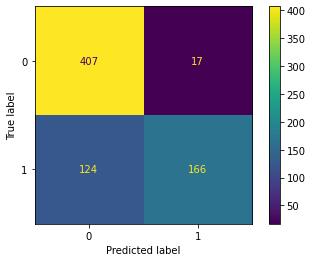

In [77]:
CM.plot();

### Classification Report

In [78]:
from sklearn.metrics import classification_report

In [79]:
report = classification_report(
    y_true=df_pred.survived,
    y_pred=df_pred.pred_dt
)

In [80]:
print(report)

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       424
           1       0.91      0.57      0.70       290

    accuracy                           0.80       714
   macro avg       0.84      0.77      0.78       714
weighted avg       0.82      0.80      0.79       714



In [82]:
report = classification_report(
    y_true=df_pred.survived,
    y_pred=df_pred.pred_dt,
    output_dict=True
)

In [83]:
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.766478,0.907104,0.802521,0.836791,0.823595
recall,0.959906,0.572414,0.802521,0.766160,0.802521
f1-score,0.852356,0.701903,0.802521,0.777129,0.791248
support,424.000000,290.000000,0.802521,714.000000,714.000000


### Sensitivity (Recall=1)

In [84]:
cm[1,1]

166

In [85]:
cm[1,:]

array([124, 166])

In [86]:
cm[1,1]/cm[1,:].sum()

0.5724137931034483

In [87]:
sensitivity = cm[1,1]/cm[1,:].sum()

### Specificity (Recall=0)

In [88]:
cm[0,0]

407

In [89]:
cm[0,:]

array([407,  17])

In [90]:
cm[0,0]/cm[0,:].sum()

0.9599056603773585

In [91]:
sensitivity = cm[0,0]/cm[0,:].sum()

### ROC Curve

In [92]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/4jRBRDbJemM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [93]:
from sklearn.metrics import RocCurveDisplay

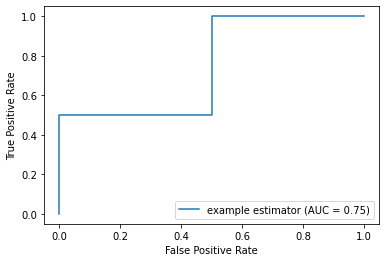

In [94]:
>>> import matplotlib.pyplot as plt
>>> import numpy as np
>>> from sklearn import metrics
>>> y = np.array([0, 0, 1, 1])
>>> pred = np.array([0.1, 0.4, 0.35, 0.8])
>>> fpr, tpr, thresholds = metrics.roc_curve(y, pred)
>>> roc_auc = metrics.auc(fpr, tpr)
>>> display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
...                                   estimator_name='example estimator')
>>> display.plot()
>>> plt.show()

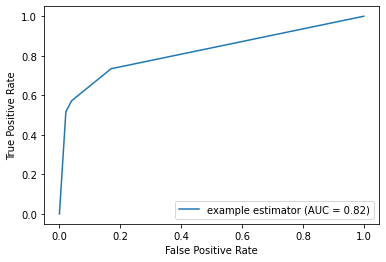

In [96]:
>>> import matplotlib.pyplot as plt
>>> import numpy as np
>>> from sklearn import metrics
>>> y = df_pred.survived
>>> pred = model_dt.predict_proba(X=explanatory)[:,1]
>>> fpr, tpr, thresholds = metrics.roc_curve(y, pred)
>>> roc_auc = metrics.auc(fpr, tpr)
>>> display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
...                                   estimator_name='example estimator')
>>> display.plot()
>>> plt.show()

https://blog.resolvingpython.com/why-all-machine-learning-models-are-the-same

## `RandomForestClassifier()` in Python

### Fit the Model

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
model_rf = RandomForestClassifier()

In [110]:
model_rf.fit(X=explanatory, y=target)

/var/folders/3v/9strff0n11gg43ttfl_2d1p80000gn/T/ipykernel_1394/192351828.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X=explanatory, y=target)


RandomForestClassifier()

### Calculate Predictions

In [112]:
model_rf.predict(X=explanatory)[:10]

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1])

In [113]:
df_pred['pred_rf'] = model_rf.predict(X=explanatory)

### Model's Score

In [114]:
model_rf.score(X=explanatory, y=target)

0.8949579831932774

## `SVC()` in Python

### Fit the Model

In [115]:
from sklearn.svm import SVC

In [116]:
model_sv = SVC()

In [117]:
model_sv.fit(X=explanatory, y=target)

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

### Calculate Predictions

In [118]:
model_sv.predict(X=explanatory)[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [119]:
df_pred['pred_sv'] = model_sv.predict(X=explanatory)

### Model's Score

In [120]:
model_sv.score(X=explanatory, y=target)

0.6204481792717087

## Which One Is the Best Model? Why?

In [121]:
model_dt.score(X=explanatory, y=target)

0.8025210084033614

In [122]:
model_rf.score(X=explanatory, y=target)

0.8949579831932774

In [123]:
model_sv.score(X=explanatory, y=target)

0.6204481792717087

In [125]:
df_pred.head(10)

,survived,pred_proba_dt,pred_dt,pred_sv,pred_rf
0,0,0.179487,0,0,0
1,1,0.943396,1,0,1
2,1,0.460784,0,0,1
3,1,0.943396,1,0,1
4,0,0.179487,0,0,0
6,0,0.179487,0,0,0
7,0,0.666667,1,1,0
8,1,0.460784,0,0,1
9,1,0.943396,1,0,1
10,1,0.460784,0,1,1


<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.